In [1]:
data = [['54',
         '73',
         '15',
         '06',
         '51',
         '64',
         '90',
         '63',
         '91',
         '72',
         '37',
         '37',
         '59',
         '28',
         '71',
         '80',
         '87',
         '56',
         '90',
         '41',
         ],
        ['70',
         '52',
         '65',
         '11',
         '69',
         '17',
         '61',
         '83',
         '51',
         '12',
         '51',
         '06',
         '38',
         '67',
         '64',
         '89',
         '32',
         '54',
         '04',
         '75',
         ],
        ['79',
         '41',
         '12',
         '38',
         '69',
         '36',
         '70',
         '56',
         '44',
         '60',
         '49',
         '14',
         '65',
         '14',
         '26',
         '86',
         '83',
         '39',
         '69',
         '35',
         ]]

In [2]:
data_split = [[[int(char) for char in cell] for cell in row] for row in data]

In [3]:
import pandas as pd
dfs = []
for [i, row] in enumerate([*data_split, [cell for row in data_split for cell in row]]):
  df = pd.DataFrame(row, columns=['Q1', 'Q2'])
  df.index = [f'A{i}' for i in range(1, len(row) + 1)]
  dfs.append(df)

In [4]:
import matplotlib as mpl
dfs[0][['Q1', 'Q2']].transpose().style.format(na_rep='')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,5,7,1,0,5,6,9,6,9,7,3,3,5,2,7,8,8,5,9,4
Q2,4,3,5,6,1,4,0,3,1,2,7,7,9,8,1,0,7,6,0,1


In [5]:
dfs[1][['Q1', 'Q2']].transpose().style.format(na_rep='')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,5,6,1,6,1,6,8,5,1,5,0,3,6,6,8,3,5,0,7
Q2,0,2,5,1,9,7,1,3,1,2,1,6,8,7,4,9,2,4,4,5


In [6]:
dfs[2][['Q1', 'Q2']].transpose().style.format(na_rep='')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,4,1,3,6,3,7,5,4,6,4,1,6,1,2,8,8,3,6,3
Q2,9,1,2,8,9,6,0,6,4,0,9,4,5,4,6,6,3,9,9,5


In [7]:
display(dfs[3].loc['A1':'A20'][['Q1', 'Q2']].transpose().style.format(na_rep=''))
display(dfs[3].loc['A21':'A40'][['Q1', 'Q2']].transpose().style.format(na_rep=''))
display(dfs[3].loc['A41':'A60'][['Q1', 'Q2']].transpose().style.format(na_rep=''))


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,5,7,1,0,5,6,9,6,9,7,3,3,5,2,7,8,8,5,9,4
Q2,4,3,5,6,1,4,0,3,1,2,7,7,9,8,1,0,7,6,0,1


,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40
Q1,7,5,6,1,6,1,6,8,5,1,5,0,3,6,6,8,3,5,0,7
Q2,0,2,5,1,9,7,1,3,1,2,1,6,8,7,4,9,2,4,4,5


,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
Q1,7,4,1,3,6,3,7,5,4,6,4,1,6,1,2,8,8,3,6,3
Q2,9,1,2,8,9,6,0,6,4,0,9,4,5,4,6,6,3,9,9,5


In [8]:
def dominates_by_pareto(a, b):
  return (not a.equals(b)) and (a >= b).all()

for df in dfs:
  df['p'] = None
  pareto_set = list(df.index)
  i = 0
  while i < len(pareto_set) - 1:
    j = i + 1
    while j < len(pareto_set):
      a1 = df.loc[pareto_set[i], ['Q1', 'Q2']]
      a2 = df.loc[pareto_set[j], ['Q1', 'Q2']]
      if dominates_by_pareto(a1, a2):
        df.loc[pareto_set[j], 'p'] = pareto_set[i]
        pareto_set.pop(j)
        j -= 1
      elif dominates_by_pareto(a2, a1):
        df.loc[pareto_set[i], 'p'] = pareto_set[j]
        pareto_set.pop(i)
        i -= 1
        break
      j += 1
    i += 1

In [9]:
def dominates_by_slater(a, b):
  return (a > b).all()


for df in dfs:
  df['s'] = None
  slater_set = list(df.index)
  i = 0
  while i < len(slater_set) - 1:
    j = i + 1
    while j < len(slater_set):
      a1 = df.loc[slater_set[i], ['Q1', 'Q2']]
      a2 = df.loc[slater_set[j], ['Q1', 'Q2']]
      if dominates_by_slater(a1, a2):
        df.loc[slater_set[j], 's'] = slater_set[i]
        slater_set.pop(j)
        j -= 1
      elif dominates_by_slater(a2, a1):
        df.loc[slater_set[i], 's'] = slater_set[j]
        slater_set.pop(i)
        i -= 1
        break
      j += 1
    i += 1


display(dfs[0][['Q1', 'Q2', 'p', 's']].transpose().style.format(na_rep=''))
display(dfs[1][['Q1', 'Q2', 'p', 's']].transpose().style.format(na_rep=''))
display(dfs[2][['Q1', 'Q2', 'p', 's']].transpose().style.format(na_rep=''))

display(dfs[3].loc['A1':'A20'][['Q1', 'Q2', 'p', 's']
                               ].transpose().style.format(na_rep=''))
display(dfs[3].loc['A21':'A40'][['Q1', 'Q2', 'p', 's']
                                ].transpose().style.format(na_rep=''))
display(dfs[3].loc['A41':'A60'][['Q1', 'Q2', 'p', 's']
                                ].transpose().style.format(na_rep=''))


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,5,7,1,0,5,6,9,6,9,7,3,3,5,2,7,8,8,5,9,4
Q2,4,3,5,6,1,4,0,3,1,2,7,7,9,8,1,0,7,6,0,1
p,A6,A17,A11,A11,A1,A17,A9,A2,,A2,A13,A13,,A13,A2,A9,,A13,A9,A9
s,A17,A17,A11,A11,A2,A17,,A17,,A17,A13,A13,,A13,A17,A9,,A17,,A13


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,5,6,1,6,1,6,8,5,1,5,0,3,6,6,8,3,5,0,7
Q2,0,2,5,1,9,7,1,3,1,2,1,6,8,7,4,9,2,4,4,5
p,A8,A3,A5,A3,A16,A5,A5,A16,A5,A5,A5,A5,A5,A5,A5,,A16,A16,A16,A16
s,A8,A3,A16,A3,,A5,A8,,A3,A3,A3,A5,A5,A16,A16,,A5,A5,A5,A16


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,4,1,3,6,3,7,5,4,6,4,1,6,1,2,8,8,3,6,3
Q2,9,1,2,8,9,6,0,6,4,0,9,4,5,4,6,6,3,9,9,5
p,,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,A16,A1,A1,A1
s,,A1,A1,A1,,A1,A16,A1,A1,A1,,A1,A1,A1,A1,,,,,A1


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,5,7,1,0,5,6,9,6,9,7,3,3,5,2,7,8,8,5,9,4
Q2,4,3,5,6,1,4,0,3,1,2,7,7,9,8,1,0,7,6,0,1
p,A6,A17,A11,A11,A1,A17,A9,A2,,A2,A13,A13,A25,A13,A2,A9,A36,A13,A9,A9
s,A17,A17,A11,A11,A2,A17,,A17,,A17,A13,A13,,A13,A17,A9,,A17,,A13


,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40
Q1,7,5,6,1,6,1,6,8,5,1,5,0,3,6,6,8,3,5,0,7
Q2,0,2,5,1,9,7,1,3,1,2,1,6,8,7,4,9,2,4,4,5
p,A9,A13,A17,A9,A36,A17,A9,A17,A9,A17,A9,A17,A25,A17,A17,,A36,A36,A36,A36
s,A9,A17,A17,A13,,A13,A17,,A17,A13,A17,A13,A13,A36,A17,,A13,A17,A13,A17


,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
Q1,7,4,1,3,6,3,7,5,4,6,4,1,6,1,2,8,8,3,6,3
Q2,9,1,2,8,9,6,0,6,4,0,9,4,5,4,6,6,3,9,9,5
p,A36,A9,A36,A36,A36,A36,A9,A36,A36,A9,A36,A36,A36,A36,A36,A36,A36,A36,A36,A36
s,,A13,A13,A13,,A13,A9,A17,A13,A9,,A13,A17,A13,A13,,,,,A13


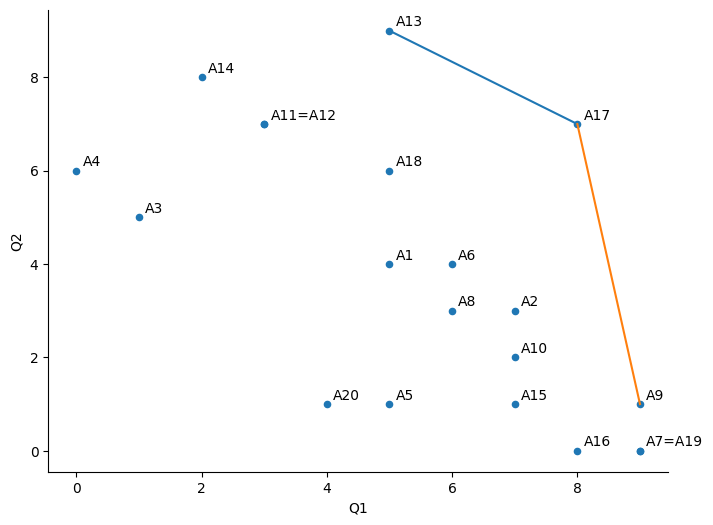

In [10]:
import matplotlib.pyplot as plt
import random

def plot(df, final_set, scale=1):
  plt.close("all")

  fig, ax = plt.subplots()
  fig.set_size_inches(8 * scale, 6 * scale, True)

  df.plot(kind='scatter', x='Q1', y='Q2', ax=ax)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  for point, rows in df[['Q1', 'Q2']].groupby(by=['Q1', 'Q2']):
    name = '='.join([k for k in rows.index])
    ax.annotate(name, [v + 0.1 for v in point])
  
  for i in range(len(final_set) - 1):
    
    plt.plot(final_set.iloc[[i, i + 1]]['Q1'],
             final_set.iloc[[i, i + 1]]['Q2'])
    
def plot_pareto(df, scale=1):
  plot(df, df[['Q1', 'Q2', 'p']].query(
      'p.isnull()').sort_values(by=['Q1', 'Q2'], ascending=[True, False]), scale=scale)


plot_pareto(dfs[0])


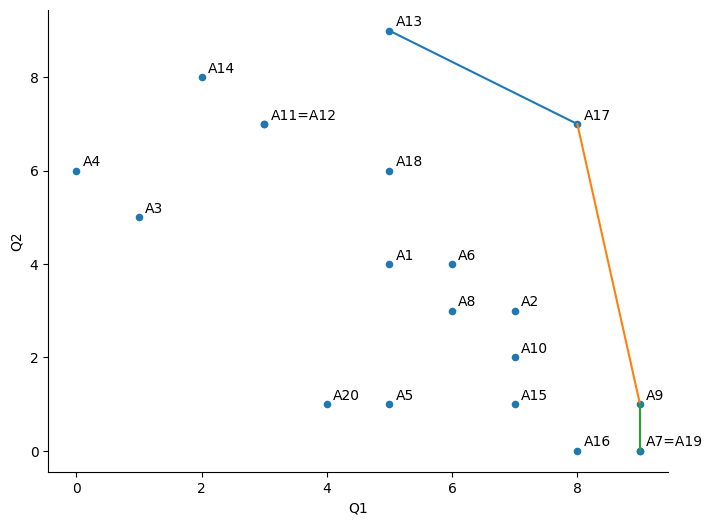

In [11]:
def plot_slater(df, scale=1):
  plot(df, df[['Q1', 'Q2', 's']].query(
      's.isnull()').sort_values(by=['Q1', 'Q2'], ascending=[True, False]), scale=scale)
  
plot_slater(dfs[0])


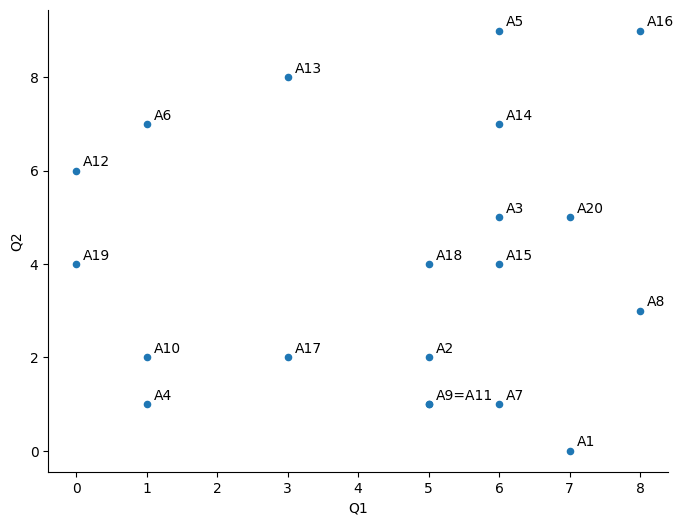

In [12]:
plot_pareto(dfs[1])


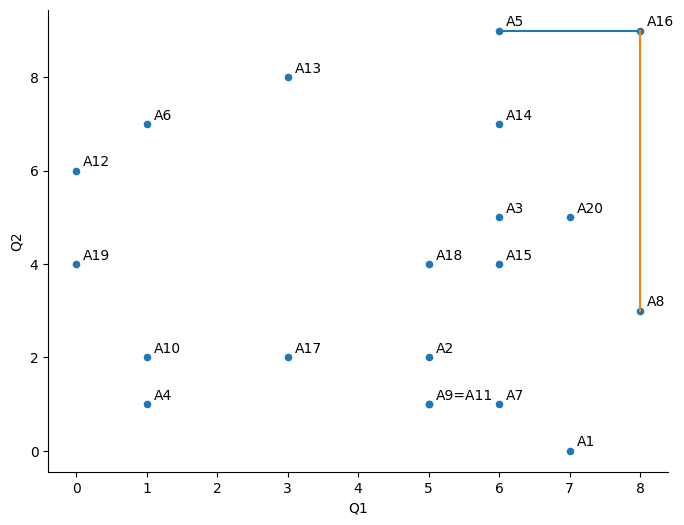

In [13]:
plot_slater(dfs[1])

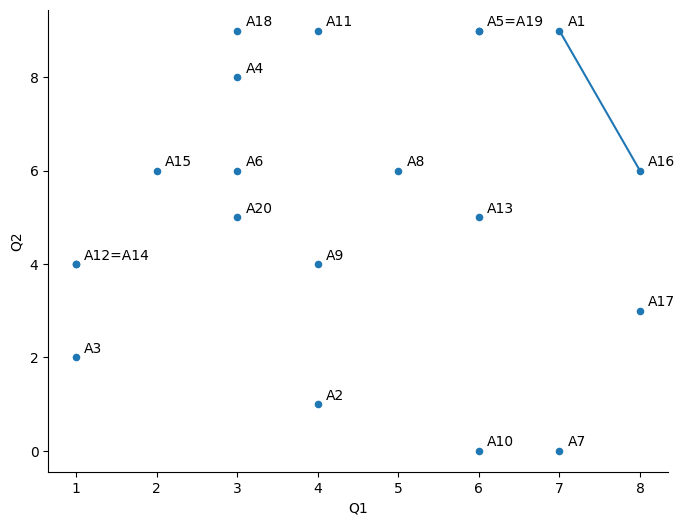

In [14]:
plot_pareto(dfs[2])

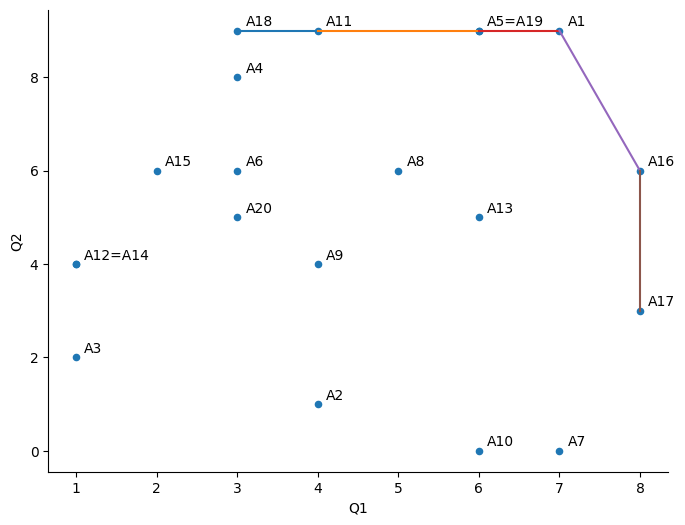

In [15]:
plot_slater(dfs[2])

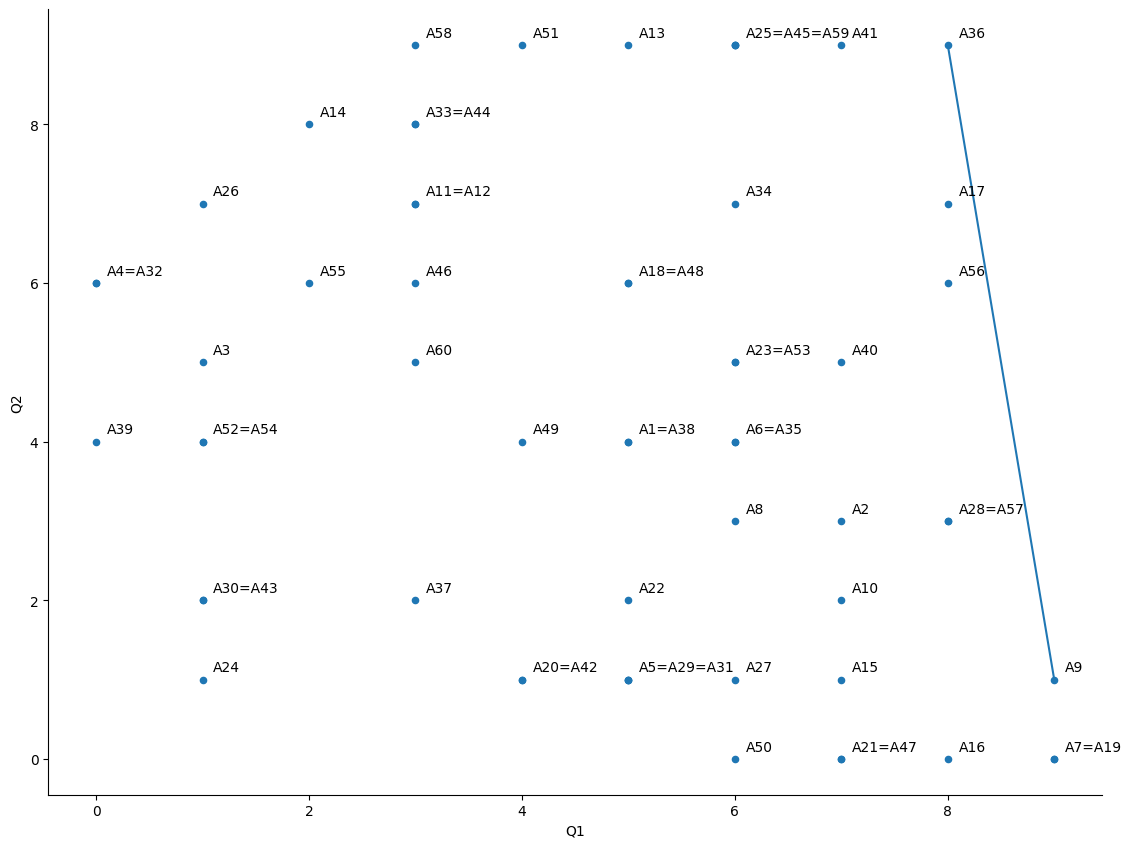

In [16]:
plot_pareto(dfs[3], scale=1.7)

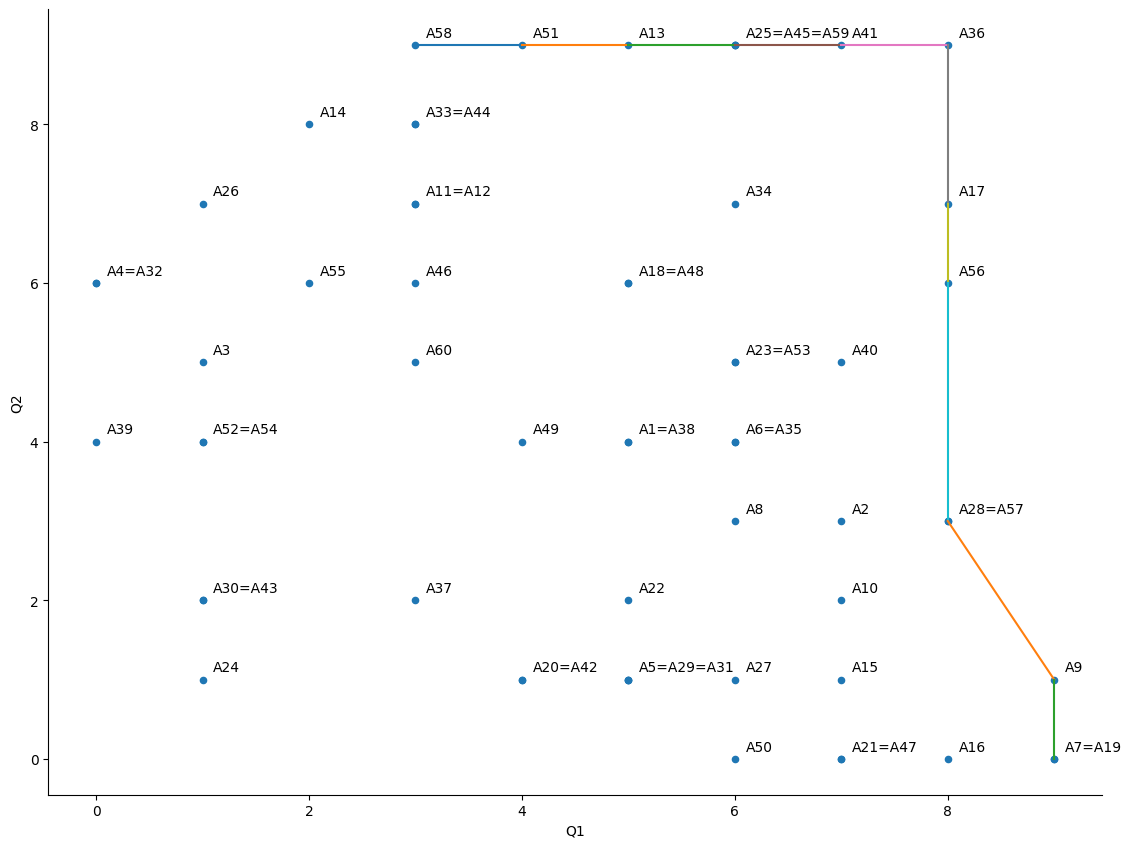

In [17]:
plot_slater(dfs[3], scale=1.7)
